### Music_genre_classification

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("music_data.csv") 
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
# Data Cleaning
df.columns= df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", df.columns)

Original column names =  Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')
Column names after conversion =  Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature', 'class'],
      dtype='object')


In [ ]:
# Convert "duration_in_min/ms" column values from minutes to milliseconds
df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in_min/ms, Length: 2580, dtype: float64

In [ ]:
condition = df['duration_in_min/ms'] < 30
condition.value_counts()

False    15416
True      2580
Name: duration_in_min/ms, dtype: int64

In [ ]:
condition = df['duration_in_min/ms'] < 30 
# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in_min/ms'] = df.loc[condition,'duration_in_min/ms']*60000

In [ ]:
# Rename "duration_in_min/ms" column name to "duration_in_ms"
df.rename(columns={"duration_in_min/ms": "duration_in_ms"}, inplace = True)
df.head(10)[['duration_in_ms']]

,duration_in_ms
0,234596.00000
1,251733.00000
2,109667.00000
3,173968.00000
4,229960.00000
5,208133.00000
6,329387.00000
7,186346.99998
8,237867.00000
9,164093.00000


In [ ]:
# Filtering duplicate rows that have same values across all columns
duplicateRows = df[df.duplicated(subset = df.columns.difference(['class']))]
duplicateRows

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
350,The Cult,She Sells Sanctuary,69.0,0.550,0.765,7.0,-8.684,1,0.0287,0.000005,0.873000,0.132,0.419,139.460,252533.0,4,6
591,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.005530,NaN,0.114,0.174,89.993,224053.0,4,9
1073,Carla Geneve,Greg's Discount Chemist,37.0,0.696,0.598,7.0,-5.413,1,0.0301,0.014600,0.000517,0.104,0.515,132.941,209661.0,4,1
1104,The Futureheads,The Beginning Of The Twist,43.0,0.420,0.988,5.0,-2.622,1,0.1570,0.001640,NaN,0.286,0.353,155.993,216040.0,4,1
1141,Brittany Howard,Stay High,54.0,0.598,0.853,9.0,-5.373,1,0.0545,0.132000,0.002970,0.132,0.312,121.988,191396.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,The Marcus King Band,Boone,38.0,0.357,0.757,7.0,-7.487,0,0.0410,0.000843,0.004350,0.262,0.488,169.981,329544.0,4,2
17953,Or Edry,◊ô◊û◊ô ◊®◊ê◊©◊ô◊™ ◊î◊ß◊ô◊•,28.0,0.612,0.676,7.0,-6.977,1,0.0267,0.272000,0.008210,0.237,0.557,130.052,230100.0,4,6
17960,The Flaming Lips,The Yeah Yeah Yeah Song,39.0,0.636,0.887,4.0,-4.354,1,0.0475,0.002570,0.000052,0.293,0.350,107.984,232520.0,4,6
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.726,NaN,-4.730,1,0.0449,0.000363,0.000142,0.383,0.661,182.587,169164.0,4,6


In [ ]:
# Remove duplicate rows from the dataset
print("Shape of dataset before removing duplicate rows =", df.shape)
df.drop_duplicates(subset = df.columns.difference(['class']), inplace = True, ignore_index = True)
print("Shape of dataset after removing duplicate rows =", df.shape)

df

Shape of dataset before removing duplicate rows = (17996, 17)
Shape of dataset after removing duplicate rows = (16319, 17)


,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
16315,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
16316,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
16317,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
# Checking null values
df.isna().sum()

popularity 397
key 1834
instrumentalness 4089


In [ ]:
# Calculate skewness of numerical variables
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in popularity = 0.08199201878144098
Skewness in danceability = -0.09377729007489485
Skewness in energy = -0.6090760159078138
Skewness in key = -0.047770986424471945
Skewness in loudness = -1.7248754408861746
Skewness in mode = -0.5634728223350667
Skewness in speechiness = 3.046775087444554
Skewness in acousticness = 1.0143193030362685
Skewness in instrumentalness = 1.5134516038529153
Skewness in liveness = 2.209049389108646
Skewness in valence = 0.100076586962193
Skewness in tempo = 0.3915548886941918
Skewness in duration_in_ms = 4.075269752271942
Skewness in time_signature = -4.039737615335105
Skewness in class = -0.6951790138843518


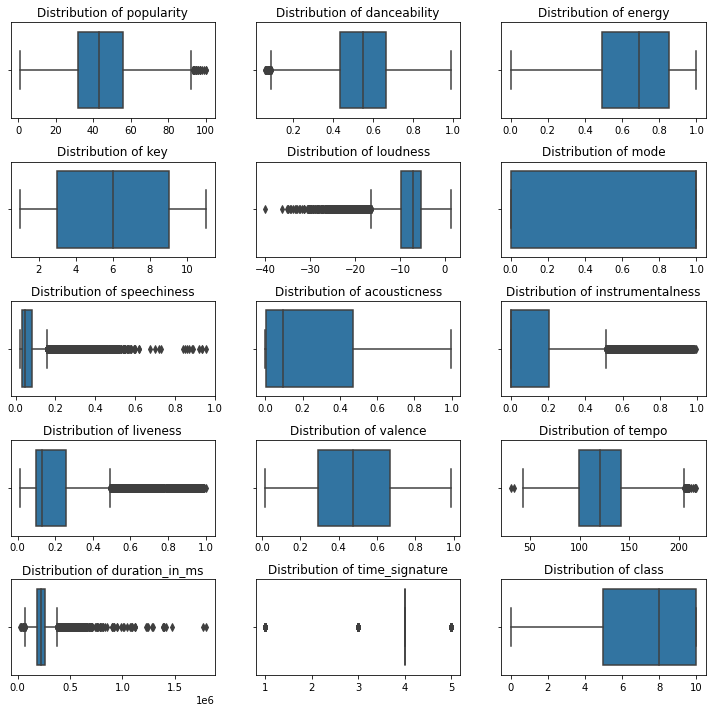

In [ ]:
# outliers detection 
df_cont = df.select_dtypes([int,float])

fig = plt.figure(figsize=(10, 10)) 
for i,columns in enumerate(df_cont.columns, 1): 
    ax = plt.subplot(5,3,i) 
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {columns}') 
    plt.tight_layout(w_pad=3)
plt.show()

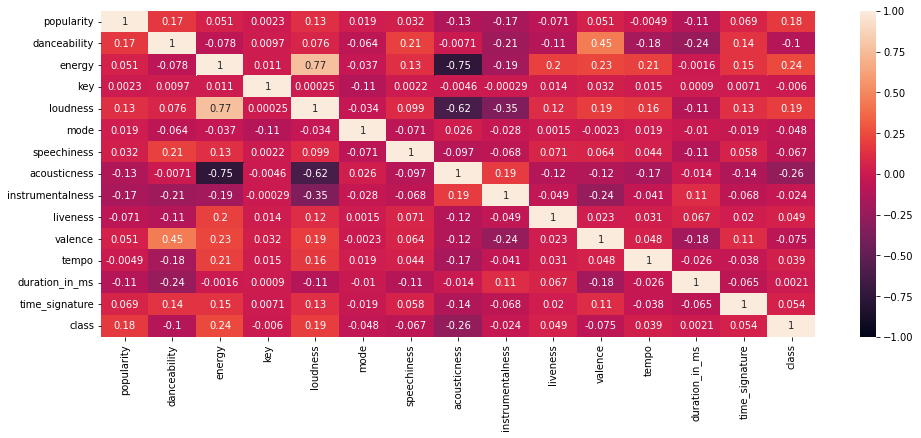

In [ ]:
# Correlation between numerical variables using heatmap
df_cont = df.select_dtypes([int,float])

plt.figure(figsize=(16, 6)) 
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True) 

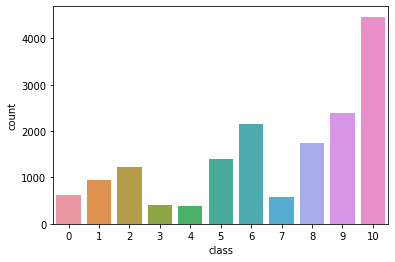

In [ ]:
# data distribution of target variable
sns.countplot(data = df, x= df["class"])

In [ ]:
# Imputing null values in "popularity" and "instrumentalness" columns with the median value of respective columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['popularity','instrumentalness']] = imp.fit_transform(df[['popularity','instrumentalness']])

In [ ]:
# Imputing null values in "key" column with a constant value of -1
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
df[['key']]=imp.fit_transform(df[['key']])

In [ ]:
df.isnull().sum()

artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_in_ms      0
time_signature      0
class               0
dtype: int64

In [ ]:
# Remove highly correlated features
df.drop(columns=["energy"], inplace = True)
df

,artist_name,track_name,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,1.0,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,10.0,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
16315,Micatone,All Gone,27.0,0.638,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
16316,Smash Hit Combo,Peine perdue,34.0,0.558,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
16317,Beherit,Salomon's Gate,29.0,0.215,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
#skewed columns = [duration_in_ms,loudness,speechiness,acousticness,instrumentalnessliveness,tempo]
# Applying transformations to minimize skewness
df["duration_in_ms_trans"] = np.sqrt(df["duration_in_ms"]) # square root transform
df["loudness_trans"] = np.cbrt(df["loudness"]) # cube root transform
df["speechiness_trans"] = np.reciprocal(df["speechiness"]) # reciprocal transform
df["acousticness_trans"] = np.cbrt(df["acousticness"]) # cube root transform
df["instrumentalness_trans"] = np.log(df["instrumentalness"]) # log transform
df["liveness_trans"] = np.log(df["liveness"]) # log transform
df["tempo_trans"] = np.cbrt(df["tempo"]) # cube root transform

In [ ]:
# Dataset after transformation
df

,artist_name,track_name,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_in_ms,time_signature,class,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,1.0,-4.964,1,0.0485,0.017100,0.003910,...,234596.0,4,5,484.351112,-1.705862,20.618557,0.257631,-5.544218,-2.466281,5.118134
1,Boston,Hitch a Ride,54.0,0.382,3.0,-7.230,1,0.0406,0.001100,0.004010,...,251733.0,4,10,501.730007,-1.933657,24.630542,0.103228,-5.518964,-2.292635,4.883353
2,The Raincoats,No Side to Fall In,35.0,0.434,6.0,-8.334,1,0.0525,0.486000,0.000196,...,109667.0,4,6,331.160082,-2.027455,19.047619,0.786222,-8.537396,-0.931404,5.285769
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,10.0,-6.528,0,0.0555,0.021200,0.003910,...,173968.0,4,5,417.094713,-1.868931,18.018018,0.276766,-5.544218,-2.103734,4.747947
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,2.0,-4.279,1,0.2160,0.000169,0.016100,...,229960.0,4,10,479.541448,-1.623482,4.629630,0.055288,-4.128936,-1.760261,5.838859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,Green-House,Find Home,35.0,0.166,7.0,-17.100,0,0.0413,0.993000,0.824000,...,193450.0,3,6,439.829512,-2.576313,24.213075,0.997661,-0.193585,-2.318714,5.556843
16315,Micatone,All Gone,27.0,0.638,11.0,-10.174,0,0.0329,0.858000,0.000016,...,257067.0,4,2,507.017751,-2.166859,30.395137,0.950231,-11.036691,-2.652143,4.179645
16316,Smash Hit Combo,Peine perdue,34.0,0.558,4.0,-4.683,0,0.0712,0.000030,0.000136,...,216222.0,4,8,464.996774,-1.673047,14.044944,0.030968,-8.902856,-0.406466,4.717694
16317,Beherit,Salomon's Gate,29.0,0.215,6.0,-12.757,0,0.1340,0.001290,0.916000,...,219693.0,4,8,468.714199,-2.336592,7.462687,0.108859,-0.087739,-1.362578,5.083440


In [ ]:
df.drop(columns = ['duration_in_ms','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
columns = ["artist_name","track_name"]
le = LabelEncoder()
for col in columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
# Features and Target
X = df.drop(columns=["class","track_name","artist_name"], axis=1)
y = df["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [ ]:
# Scaling Data & Training XGBClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

XG Boost accuracy is: 49.87%


In [ ]:
# Normalizing Data and Training XGBClassifier
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

normalizer = Normalizer()
normalized_x_train = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=11, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

XG Boost accuracy is: 22.02%


In [ ]:
# Scaling Data & Training LR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 45.56%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear').fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_pred = LR.predict(normalized_x_test)

LRAcc = accuracy_score(y_pred,y_test) # Calculate accuracy
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 45.27%
